In [1]:
import numpy as np
import matplotlib.pyplot as plt

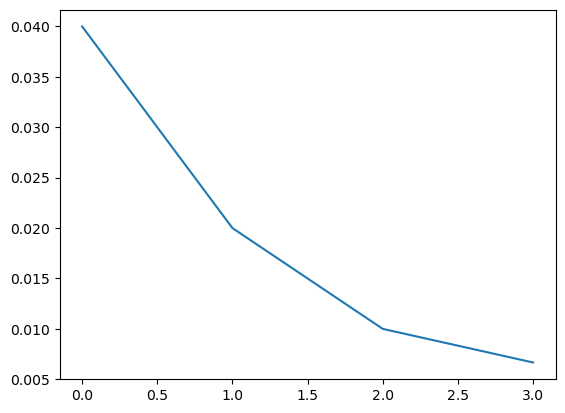

In [2]:
a = [1/25, 1/50, 1/100, 1/150]
plt.plot(a)